In [1]:
import pandas as pd
import os

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_path=os.path.join(os.getcwd(),"Transformed_data","EDA.csv")

df = pd.read_csv(file_path)

In [3]:
df['Artist_Reputation'].unique()

array(['Low_Reputation', 'High_Reputation', 'Moderate_Reputation'],
      dtype=object)

In [4]:
df.head()

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Cost,State
0,Low_Reputation,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,urban,-283.29,Ohio
1,Low_Reputation,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,urban,-159.96,Wyoming
2,Low_Reputation,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,remote,-154.29,Washington
3,Low_Reputation,9.0,8.0,649.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,remote,-161.16,Kentucky
4,Low_Reputation,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,urban,-159.23,Pennsylvania


In [5]:
df.shape

(5472, 16)

#### Train Test Split


In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X is your feature matrix and y is your target variable
X = df.drop('Cost', axis=1)  # Features (excluding the target column)
y = np.log(df['Cost'].abs() + 1)  # Target variable



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Check the shapes of the resulting sets
print("Training set - X shape:", X_train.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (4651, 15)
Training set - y shape: (4651,)
Testing set - X shape: (821, 15)
Testing set - y shape: (821,)


In [7]:
X_train

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,State
457,Moderate_Reputation,26.0,18.0,1828523.0,Marble,3658.05,98.75,Yes,Yes,No,Airways,No,Working Class,remote,Georgia
4165,High_Reputation,19.0,7.0,9381.0,Brass,52.19,84.80,No,Yes,No,Airways,No,Working Class,urban,Pennsylvania
2699,Low_Reputation,19.0,8.0,4071.0,Bronze,5.47,10.45,No,No,Yes,Airways,No,Working Class,urban,Pennsylvania
90,Moderate_Reputation,13.0,7.0,51068.0,Stone,153.97,71.73,No,Yes,No,Roadways,No,Wealthy,urban,North Carolina
798,High_Reputation,19.0,11.0,985.0,Clay,5.70,23.36,No,No,Yes,Roadways,Yes,Working Class,urban,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Low_Reputation,12.0,8.0,1509.0,Bronze,6.92,22.45,No,Yes,Yes,Airways,No,Working Class,remote,Colorado
5191,Moderate_Reputation,22.0,11.0,2607.0,Clay,8.77,14.71,No,Yes,No,Roadways,Yes,Working Class,urban,Montana
5226,Low_Reputation,35.0,9.0,1377280.0,Stone,1049.68,79.37,No,Yes,No,Airways,No,Working Class,remote,Kentucky
5390,Moderate_Reputation,19.0,8.0,256.0,Wood,6.94,10.04,No,No,Yes,Roadways,No,Working Class,urban,Arkansas


#### Data Distribution

In [8]:
def split_numerical_categorical_labels(df):
    """
    Identify and return labels of numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_labels: List of labels for numerical columns
    - categorical_labels: List of labels for categorical columns
    """
    # Identify numerical columns
    numerical_labels = list(df.select_dtypes(include=['number']).columns)

    # Identify categorical columns
    categorical_labels = list(df.select_dtypes(include=['object', 'category']).columns)

    return numerical_labels, categorical_labels


numerical_labels, categorical_labels = split_numerical_categorical_labels(df=X_train)

In [9]:
numerical_labels

['Height', 'Width', 'Weight', 'Price_Of_Sculpture', 'Base_Shipping_Price']

In [10]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'State']

In [11]:
def print_categories_for_columns(data, categorical_columns):
    """
    Print the unique categories for the specified categorical columns in the given DataFrame.

    Parameters:
    - data: pandas DataFrame
        The input DataFrame containing categorical variables.
    - categorical_columns: list
        A list of column names with categorical variables.

    Returns:
    None
    """
    for column in categorical_columns:
        unique_categories = data[column].unique()
        print(f"{column} categories: {unique_categories}")
        
        
print_categories_for_columns(data=df, categorical_columns=categorical_labels)

Artist_Reputation categories: ['Low_Reputation' 'High_Reputation' 'Moderate_Reputation']
Material categories: ['Brass' 'Clay' 'Aluminium' 'Wood' 'Marble' 'Bronze' 'Stone']
International categories: ['Yes' 'No']
Express_Shipment categories: ['Yes' 'No']
Installation_Included categories: ['No' 'Yes']
Transport categories: ['Airways' 'Roadways' 'Waterways']
Fragile categories: ['No' 'Yes']
Customer_Information categories: ['Working Class' 'Wealthy']
Remote_Location categories: ['urban' 'remote']
State categories: ['Ohio' 'Wyoming' 'Washington' 'Kentucky' 'Pennsylvania' 'Alabama'
 'West Virginia' 'California' 'North Dakota' 'Georgia'
 'District of Columbia' 'Texas' 'AE' 'Oregon' 'Arkansas' 'Vermont' 'Iowa'
 'Colorado' 'New Hampshire' 'South Carolina' 'AA' 'Oklahoma' 'AP' 'Hawaii'
 'Rhode Island' 'Louisiana' 'Delaware' 'Idaho' 'Connecticut' 'Florida'
 'Virginia' 'Massachusetts' 'Kansas' 'Maine' 'North Carolina' 'Nevada'
 'Maryland' 'South Dakota' 'Wisconsin' 'Minnesota' 'Montana' 'Mississip

In [12]:
y_train

457     10.128905
4165     7.708253
2699     5.139556
90       6.533949
798      6.491679
          ...    
3772     6.361320
5191     6.297827
5226     8.709541
5390     5.133384
860      6.142811
Name: Cost, Length: 4651, dtype: float64

In [13]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'State']

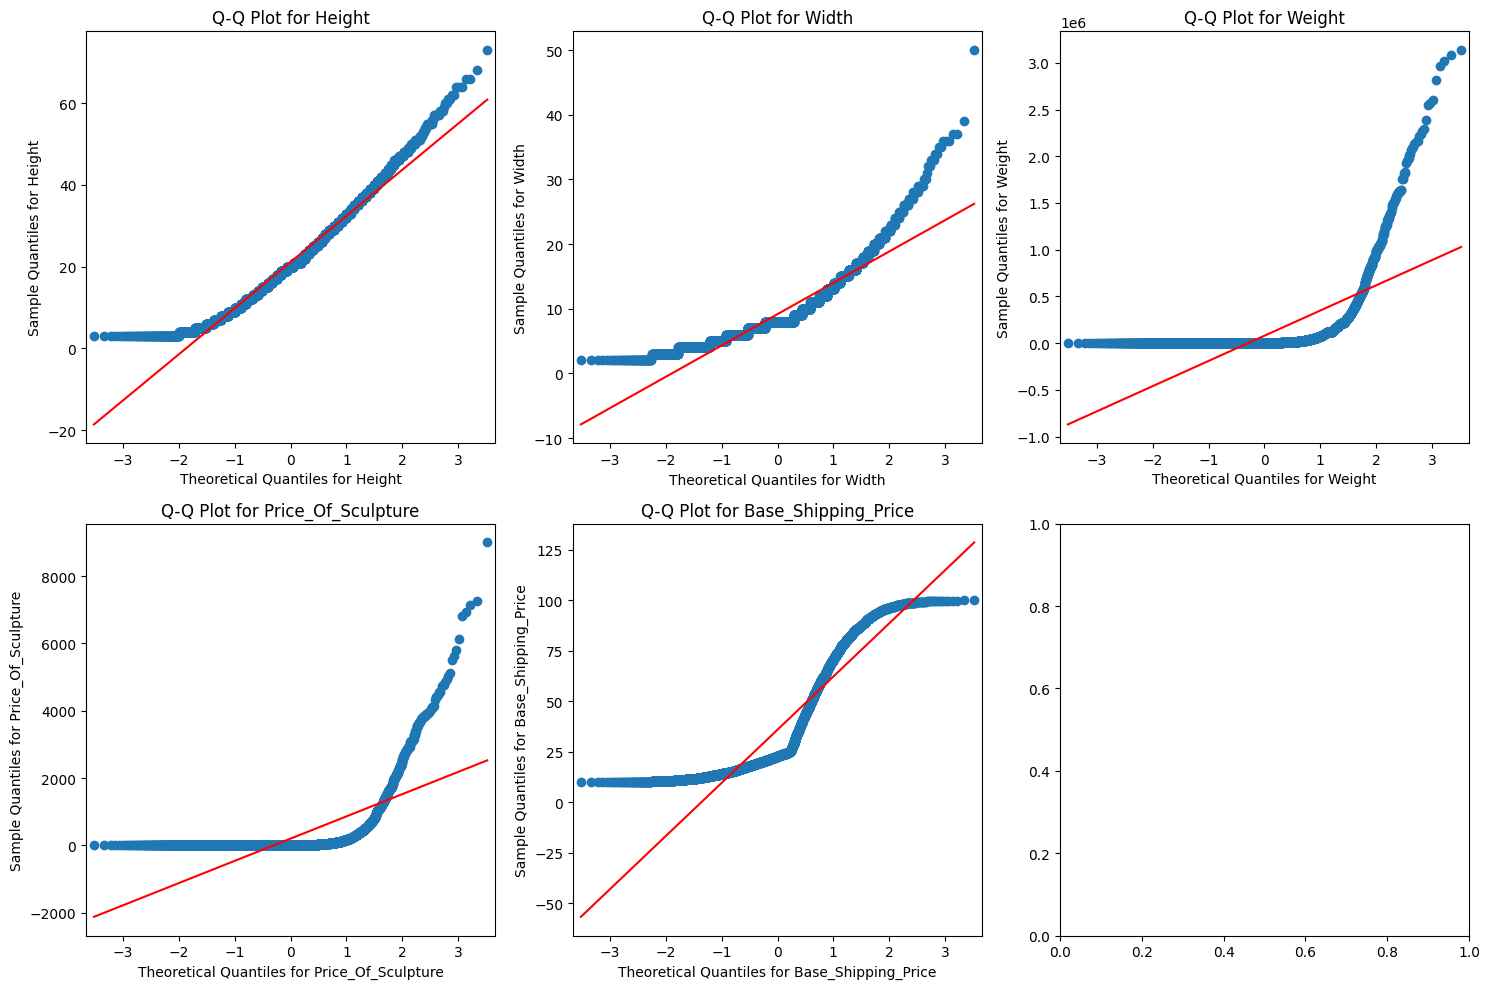

In [14]:
def plot_qq_plots(dataframe, column_labels, plots_per_row=3):
    # Check if the columns exist in the DataFrame
    for label in column_labels:
        if label not in dataframe.columns:
            raise ValueError(f"Column '{label}' not found in the DataFrame.")

    # Calculate the number of rows needed
    num_columns = len(column_labels)
    num_rows = (num_columns + plots_per_row - 1) // plots_per_row

    # Create Q-Q plots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

    for i, label in enumerate(column_labels):
        row_idx = i // plots_per_row
        col_idx = i % plots_per_row

        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        sm.qqplot(dataframe[label], line='s', ax=ax)
        ax.set_xlabel(f'Theoretical Quantiles for {label}')
        ax.set_ylabel(f'Sample Quantiles for {label}')
        ax.set_title(f'Q-Q Plot for {label}')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()
    plt.show()

plot_qq_plots(dataframe=X_train, column_labels=numerical_labels)

In [15]:
import numpy as np

# Base 2 logarithm transform the specified numerical columns
X_train[numerical_labels] = np.log(X_train[numerical_labels]+1)
X_test[numerical_labels] = np.log(X_test[numerical_labels])

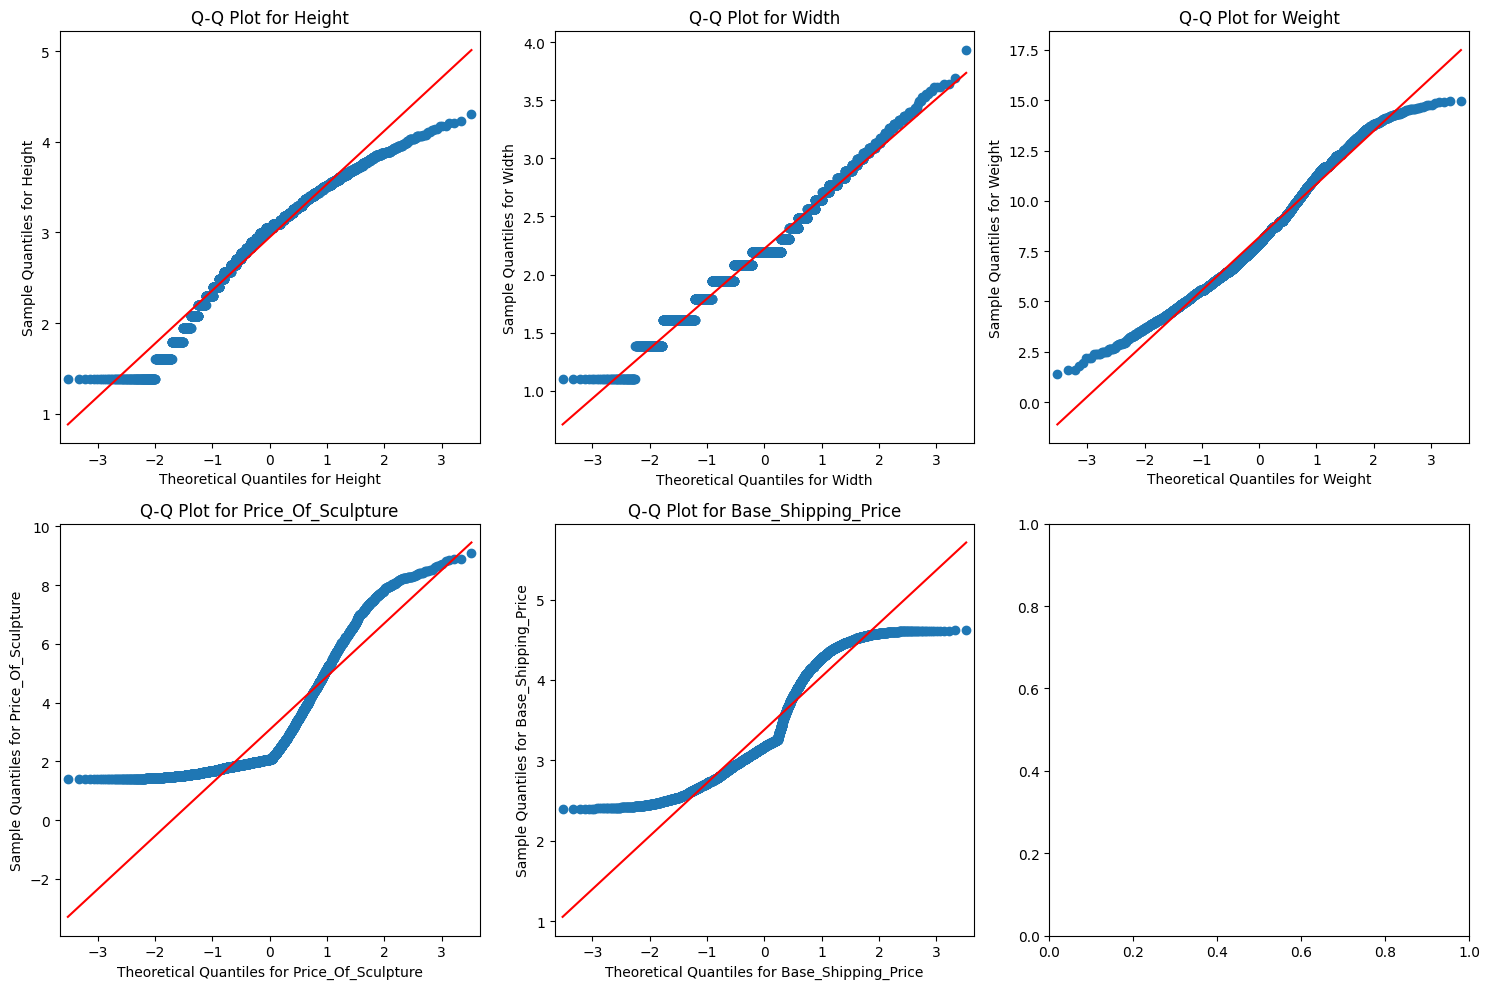

In [16]:
plot_qq_plots(dataframe=X_train, column_labels=numerical_labels)

In [17]:
X_train[categorical_labels]

,Artist_Reputation,Material,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,State
457,Moderate_Reputation,Marble,Yes,Yes,No,Airways,No,Working Class,remote,Georgia
4165,High_Reputation,Brass,No,Yes,No,Airways,No,Working Class,urban,Pennsylvania
2699,Low_Reputation,Bronze,No,No,Yes,Airways,No,Working Class,urban,Pennsylvania
90,Moderate_Reputation,Stone,No,Yes,No,Roadways,No,Wealthy,urban,North Carolina
798,High_Reputation,Clay,No,No,Yes,Roadways,Yes,Working Class,urban,Alabama
...,...,...,...,...,...,...,...,...,...,...
3772,Low_Reputation,Bronze,No,Yes,Yes,Airways,No,Working Class,remote,Colorado
5191,Moderate_Reputation,Clay,No,Yes,No,Roadways,Yes,Working Class,urban,Montana
5226,Low_Reputation,Stone,No,Yes,No,Airways,No,Working Class,remote,Kentucky
5390,Moderate_Reputation,Wood,No,No,Yes,Roadways,No,Working Class,urban,Arkansas


In [18]:
X_train.isna().sum()

Artist_Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price_Of_Sculpture       0
Base_Shipping_Price      0
International            0
Express_Shipment         0
Installation_Included    0
Transport                0
Fragile                  0
Customer_Information     0
Remote_Location          0
State                    0
dtype: int64

In [19]:
def print_unique_counts(dataframe, column_labels):
    for label in column_labels:
        unique_counts = dataframe[label].nunique()
        print(f"Unique count for column '{label}': {unique_counts}")


# Call the function with your DataFrame and column labels
print_unique_counts(dataframe=X_train, column_labels=categorical_labels)

Unique count for column 'Artist_Reputation': 3
Unique count for column 'Material': 7
Unique count for column 'International': 2
Unique count for column 'Express_Shipment': 2
Unique count for column 'Installation_Included': 2
Unique count for column 'Transport': 3
Unique count for column 'Fragile': 2
Unique count for column 'Customer_Information': 2
Unique count for column 'Remote_Location': 2
Unique count for column 'State': 54


In [20]:
X_train.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Price_Of_Sculpture', 'Base_Shipping_Price', 'International',
       'Express_Shipment', 'Installation_Included', 'Transport', 'Fragile',
       'Customer_Information', 'Remote_Location', 'State'],
      dtype='object')

In [21]:
X_train['State'].unique()

array(['Georgia', 'Pennsylvania', 'North Carolina', 'Alabama', 'Arkansas',
       'AA', 'Mississippi', 'South Carolina', 'New Jersey', 'AP',
       'Wyoming', 'California', 'Massachusetts', 'Missouri', 'Tennessee',
       'District of Columbia', 'North Dakota', 'Utah', 'Louisiana',
       'Kansas', 'Delaware', 'Illinois', 'Idaho', 'Oregon', 'Arizona',
       'Florida', 'Nebraska', 'Virginia', 'West Virginia', 'Oklahoma',
       'Connecticut', 'Alaska', 'Maine', 'Maryland', 'New Mexico',
       'Rhode Island', 'Colorado', 'Michigan', 'Vermont', 'Kentucky',
       'Montana', 'Iowa', 'Indiana', 'New Hampshire', 'Nevada', 'Ohio',
       'AE', 'Minnesota', 'Texas', 'South Dakota', 'Washington',
       'New York', 'Wisconsin', 'Hawaii'], dtype=object)

In [22]:
X_test.shape

(821, 15)

In [23]:
X_train

,Artist_Reputation,Height,Width,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,State
457,Moderate_Reputation,3.295837,2.944439,14.419020,Marble,8.204959,4.602667,Yes,Yes,No,Airways,No,Working Class,remote,Georgia
4165,High_Reputation,2.995732,2.079442,9.146548,Brass,3.973870,4.452019,No,Yes,No,Airways,No,Working Class,urban,Pennsylvania
2699,Low_Reputation,2.995732,2.197225,8.311890,Bronze,1.867176,2.437990,No,No,Yes,Airways,No,Working Class,urban,Pennsylvania
90,Moderate_Reputation,2.639057,2.079442,10.840933,Stone,5.043232,4.286754,No,Yes,No,Roadways,No,Wealthy,urban,North Carolina
798,High_Reputation,2.995732,2.484907,6.893656,Clay,1.902108,3.192942,No,No,Yes,Roadways,Yes,Working Class,urban,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Low_Reputation,2.564949,2.197225,7.319865,Bronze,2.069391,3.154870,No,Yes,Yes,Airways,No,Working Class,remote,Colorado
5191,Moderate_Reputation,3.135494,2.484907,7.866339,Clay,2.279316,2.754297,No,Yes,No,Roadways,Yes,Working Class,urban,Montana
5226,Low_Reputation,3.583519,2.302585,14.135622,Stone,6.957193,4.386641,No,Yes,No,Airways,No,Working Class,remote,Kentucky
5390,Moderate_Reputation,2.995732,2.197225,5.549076,Wood,2.071913,2.401525,No,No,Yes,Roadways,No,Working Class,urban,Arkansas


In [24]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'State']

In [25]:
X_train.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Price_Of_Sculpture', 'Base_Shipping_Price', 'International',
       'Express_Shipment', 'Installation_Included', 'Transport', 'Fragile',
       'Customer_Information', 'Remote_Location', 'State'],
      dtype='object')

In [26]:
import joblib

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'State']

In [29]:
X_train.columns

Index(['Artist_Reputation', 'Height', 'Width', 'Weight', 'Material',
       'Price_Of_Sculpture', 'Base_Shipping_Price', 'International',
       'Express_Shipment', 'Installation_Included', 'Transport', 'Fragile',
       'Customer_Information', 'Remote_Location', 'State'],
      dtype='object')

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [31]:
def transform_data_with_get_dummies(X_train, X_test, categorical_labels):
    # Use pd.get_dummies to one-hot encode categorical features with integer encoding
    X_train_transformed = pd.get_dummies(X_train, columns=categorical_labels, drop_first=True, dtype=int)
    X_test_transformed = pd.get_dummies(X_test, columns=categorical_labels, drop_first=True, dtype=int)

    # Align the dataframes to make sure they have the same columns after one-hot encoding
    X_train_transformed, X_test_transformed = X_train_transformed.align(X_test_transformed, join='outer', axis=1, fill_value=0)

    return X_train_transformed.values, X_test_transformed.values

X_train, X_test=transform_data_with_get_dummies(X_train, X_test, categorical_labels)

In [32]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def transform_data_with_onehotencoder(X_train, X_test, categorical_labels):
    # Create a one-hot encoder
    onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

    # Fit and transform the training data
    X_train_transformed = onehot_encoder.fit_transform(X_train[categorical_labels])

    # Transform the test data using the same encoder
    X_test_transformed = onehot_encoder.transform(X_test[categorical_labels])

    # Concatenate the one-hot encoded features with the non-categorical features
    X_train_transformed = np.concatenate([X_train.drop(columns=categorical_labels).values, X_train_transformed], axis=1)
    X_test_transformed = np.concatenate([X_test.drop(columns=categorical_labels).values, X_test_transformed], axis=1)

    return X_train_transformed, X_test_transformed,onehot_encoder

# Example usage
#X_train, X_test,onehot_encoder = transform_data_with_onehotencoder(X_train, X_test, categorical_labels)


In [34]:
def save_onehot_encoder(onehot_encoder, file_path="Preprocessor\one_hot_encoder.joblib"):
    # Save the one-hot encoder object to the specified file path
    joblib.dump(onehot_encoder, file_path)
    
#save_onehot_encoder(onehot_encoder=onehot_encoder)

In [35]:
X_train.shape

(4651, 74)

In [36]:
X_test.shape

(821, 74)

In [37]:
import seaborn as sns

In [38]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'State']

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
import pandas as pd

class RegressionModels:
    def __init__(self):
        self.models = {
            'Linear Regression': LinearRegression(),
            'Ridge Regression': Ridge(),
            'Lasso Regression': Lasso(),
            'AdaBoost': AdaBoostRegressor(),
            'Decision Tree': DecisionTreeRegressor(),
            'Random Forest': RandomForestRegressor(),
            'KNeighbors': KNeighborsRegressor()
        }
        self.trained_models = {}

    def train_models(self, X_train, y_train):
        for model_name, model in self.models.items():
            if 'Regression' in model_name:
                # For linear regression models, use standard scaling
                pipeline = make_pipeline(StandardScaler(), model)
            else:
                # For other models, no need for scaling
                pipeline = model
            pipeline.fit(X_train, y_train)
            self.trained_models[model_name] = pipeline

    def predict_models(self, X_test):
        predictions = {}
        for model_name, model in self.trained_models.items():
            predictions[model_name] = model.predict(X_test)
        return predictions

    def evaluate_models(self, y_true, predictions):
        evaluations = {}
        for model_name, y_pred in predictions.items():
            mse = mean_squared_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            evaluations[model_name] = {'Mean Squared Error': mse, 'R2 Score': r2}
        return evaluations

# Assuming you have X_train, y_train, and X_test defined elsewhere
# Create an instance of the RegressionModels class
regression_models = RegressionModels()

# Train the models on the training data
regression_models.train_models(X_train, y_train)

# Predict using the trained models on the test data
predictions = regression_models.predict_models(X_test)

# Evaluate the models on the test data
evaluations = regression_models.evaluate_models(y_test, predictions)

# Create a list of dictionaries to store the data
data_list = []

# Populate the list with evaluation results
for model_name, metrics in evaluations.items():
    data_list.append({
        'Model Name': model_name,
        'Mean Squared Error': metrics['Mean Squared Error'],
        'R2 Score': metrics['R2 Score']
    })

# Create a DataFrame from the list
results_df = pd.DataFrame(data_list)

# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)

# Display the evaluations
for model_name, metrics in evaluations.items():
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R2 Score: {metrics['R2 Score']}")



Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression            0.227126  0.853802
1   Ridge Regression            0.227074  0.853836
2   Lasso Regression            1.437736  0.074549
3           AdaBoost            0.287167  0.815154
4      Decision Tree            0.257474  0.834267
5      Random Forest            0.145568  0.906300
6         KNeighbors            0.240543  0.845166

Linear Regression Evaluation:
Mean Squared Error: 0.2271263068958951
R2 Score: 0.8538018512222068

Ridge Regression Evaluation:
Mean Squared Error: 0.22707372862982347
R2 Score: 0.8538356951448711

Lasso Regression Evaluation:
Mean Squared Error: 1.4377361693377946
R2 Score: 0.07454856612270155

AdaBoost Evaluation:
Mean Squared Error: 0.2871671146438082
R2 Score: 0.8151543908560605

Decision Tree Evaluation:
Mean Squared Error: 0.25747416150998703
R2 Score: 0.8342673454020972

Random Forest Evaluation:
Mean Squared Error: 0.145567776143809
R2 Score: 0.90629998

In [40]:
# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)


Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression            0.227126  0.853802
1   Ridge Regression            0.227074  0.853836
2   Lasso Regression            1.437736  0.074549
3           AdaBoost            0.287167  0.815154
4      Decision Tree            0.257474  0.834267
5      Random Forest            0.145568  0.906300
6         KNeighbors            0.240543  0.845166


In [41]:
# Display the DataFrame
print("\nEvaluations DataFrame:")
print(results_df)

# Sort the DataFrame by a metric (e.g., Mean Squared Error or R2 Score)
results_df_sorted_mse = results_df.sort_values(by='Mean Squared Error', ascending=True)
results_df_sorted_r2 = results_df.sort_values(by='R2 Score', ascending=False)

# Display the top 3 models based on Mean Squared Error
top_3_mse = results_df_sorted_mse.head(3)
print("\nTop 3 models based on Mean Squared Error:")
print(top_3_mse)

# Display the top 3 models based on R2 Score
top_3_r2 = results_df_sorted_r2.head(3)
print("\nTop 3 models based on R2 Score:")
print(top_3_r2)


Evaluations DataFrame:
          Model Name  Mean Squared Error  R2 Score
0  Linear Regression            0.227126  0.853802
1   Ridge Regression            0.227074  0.853836
2   Lasso Regression            1.437736  0.074549
3           AdaBoost            0.287167  0.815154
4      Decision Tree            0.257474  0.834267
5      Random Forest            0.145568  0.906300
6         KNeighbors            0.240543  0.845166

Top 3 models based on Mean Squared Error:
          Model Name  Mean Squared Error  R2 Score
5      Random Forest            0.145568  0.906300
1   Ridge Regression            0.227074  0.853836
0  Linear Regression            0.227126  0.853802

Top 3 models based on R2 Score:
          Model Name  Mean Squared Error  R2 Score
5      Random Forest            0.145568  0.906300
1   Ridge Regression            0.227074  0.853836
0  Linear Regression            0.227126  0.853802


In [42]:
import optuna
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

class OptunaRegression:
    def __init__(self, X_train, y_train, X_validation, y_validation):
        self.X_train = X_train
        self.y_train = y_train
        self.X_validation = X_validation
        self.y_validation = y_validation
        self.study_xgboost = optuna.create_study(direction='maximize')  # Change to 'maximize' for R2 score
        self.study_random_forest = optuna.create_study(direction='maximize')  # Change to 'maximize' for R2 score
        self.study_lightgbm = optuna.create_study(direction='maximize')  # Change to 'maximize' for R2 score
        self.best_models_xgboost = []
        self.best_models_random_forest = []
        self.best_models_lightgbm = []
        self.results_df = None

    def objective_xgboost(self, trial):
        xgboost_params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 50),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            # Add other XGBoost hyperparameters as needed for optimization
        }

        xgboost_model = XGBRegressor(**xgboost_params)
        xgboost_model.fit(self.X_train, self.y_train)
        predictions = xgboost_model.predict(self.X_validation)
        r2 = r2_score(self.y_validation, predictions)

        return r2

    def objective_random_forest(self, trial):
        random_forest_params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
            # Add other Random Forest hyperparameters as needed for optimization
        }

        rf_model = RandomForestRegressor(**random_forest_params)
        rf_model.fit(self.X_train, self.y_train)
        predictions = rf_model.predict(self.X_validation)
        r2 = r2_score(self.y_validation, predictions)

        return r2

    def objective_lightgbm(self, trial):
        lightgbm_params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            # Add other LightGBM hyperparameters as needed for optimization
        }

        lightgbm_model = lgb.LGBMRegressor(**lightgbm_params)
        lightgbm_model.fit(self.X_train, self.y_train)
        predictions = lightgbm_model.predict(self.X_validation)
        r2 = r2_score(self.y_validation, predictions)

        return r2

    def run_optimization(self, n_trials=50):
        self.study_xgboost.optimize(self.objective_xgboost, n_trials=n_trials, n_jobs=-1)
        self.study_random_forest.optimize(self.objective_random_forest, n_trials=n_trials, n_jobs=-1)
        self.study_lightgbm.optimize(self.objective_lightgbm, n_trials=n_trials, n_jobs=-1)

        # Get the best hyperparameters and models for XGBoost
        for i in range(3):
            trial = self.study_xgboost.trials[i]
            xgboost_params = {key: trial.params[key] for key in trial.params}
            best_model = XGBRegressor(**xgboost_params)
            best_model.fit(self.X_train, self.y_train)
            self.best_models_xgboost.append((xgboost_params, best_model))

        # Get the best hyperparameters and models for Random Forest
        for i in range(3):
            trial = self.study_random_forest.trials[i]
            random_forest_params = {key: trial.params[key] for key in trial.params}
            best_model = RandomForestRegressor(**random_forest_params)
            best_model.fit(self.X_train, self.y_train)
            self.best_models_random_forest.append((random_forest_params, best_model))

        # Get the best hyperparameters and models for LightGBM
        for i in range(3):
            trial = self.study_lightgbm.trials[i]
            lightgbm_params = {key: trial.params[key] for key in trial.params}
            best_model = lgb.LGBMRegressor(**lightgbm_params)
            best_model.fit(self.X_train, self.y_train)
            self.best_models_lightgbm.append((lightgbm_params, best_model))

        # Create a DataFrame to store the results
        self.results_df = pd.DataFrame({
            #'Model': ['XGBoost', 'Random Forest', 'LightGBM'],
            'Model': ['Random Forest'],
            'Best_Parameters': [
                # str(self.study_xgboost.best_params),
                str(self.study_random_forest.best_params)
               # str(self.study_lightgbm.best_params)
            ],
            'Final_Optimized_Score': [
              #  self.study_xgboost.best_value,
                self.study_random_forest.best_value
              #  self.study_lightgbm.best_value
            ]
        })

        return self.results_df

# Assuming X_train, X_test, y_train, y_test are available
optuna_regression = OptunaRegression(X_train, y_train, X_test, y_test)
results_df = optuna_regression.run_optimization(n_trials=10)

# Print the results DataFrame
print("Results DataFrame:")
print(results_df)


c:\Users\Hitesh\Documents\Projects\ML_PRoject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-12-13 15:07:57,981] A new study created in memory with name: no-name-8e77d063-6b0e-4484-9784-e29cfbbafc29
[I 2023-12-13 15:07:57,987] A new study created in memory with name: no-name-cfa99dfd-748b-4b1d-9bfd-ae9078a37fe0
[I 2023-12-13 15:07:57,990] A new study created in memory with name: no-name-85d84839-ace6-4866-9c01-06cdb1b74a47
C:\Users\Hitesh\AppData\Local\Temp\ipykernel_1072\1143544966.py:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
[I 2023-12-13 15:07:59,085] Trial 4 f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4651, number of used features: 74
[LightGBM] [Info] Start training from score 6.347965
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of t

In [43]:
results_df.columns


Index(['Model', 'Best_Parameters', 'Final_Optimized_Score'], dtype='object')

In [44]:
results_df[['Model','Final_Optimized_Score']]

,Model,Final_Optimized_Score
0,Random Forest,0.902658


In [45]:
results_df.to_csv('results.csv', index=False)

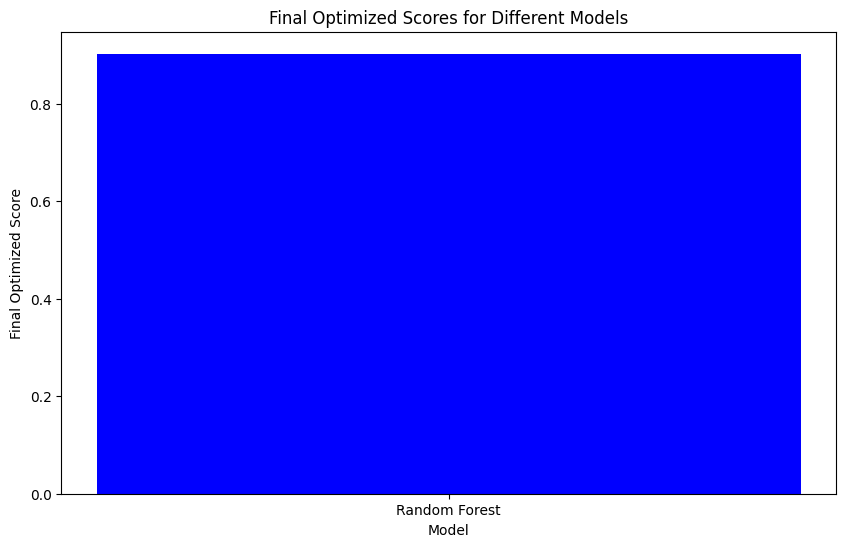

In [46]:
def plot_model_scores(results_df):
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Model'], results_df['Final_Optimized_Score'], color=['blue', 'green'])
    plt.title('Final Optimized Scores for Different Models')
    plt.xlabel('Model')
    plt.ylabel('Final Optimized Score')
    plt.show()

# Assuming results_df is the DataFrame containing the optimization results
plot_model_scores(results_df)

In [47]:
# Use the best XGBoost model for predictions
#best_xgboost_model = optuna_regression.best_models_xgboost[0][1]
#xgboost_predictions = best_xgboost_model.predict(X_test)

# Use the best Random Forest model for predictions
best_rf_model = optuna_regression.best_models_random_forest[0][1]
rf_predictions = best_rf_model.predict(X_test)

#light_gbm_model=optuna_regression.best_models_lightgbm[0][1]
#gbm_prediction=light_gbm_model.predict(X_test)

# Assuming you have the true y_test values for comparison
y_true = y_test

# Assuming you have log-transformed predictions
#log_transformed_predictions_xgboost = best_xgboost_model.predict(X_test)  # Replace with your actual predictions
log_transformed_predictions_rf = best_rf_model.predict(X_test)  # Replace with your actual predictions
#log_transformed_predictions_gbm = light_gbm_model.predict(X_test)


# Inverse log transformation to get back the original scale
#original_predictions_xgboost = np.exp(log_transformed_predictions_xgboost)
original_predictions_rf = np.exp(log_transformed_predictions_rf)
#original_predictions_gbm = np.exp(log_transformed_predictions_gbm)
# Compare predictions with true values
results_comparison = pd.DataFrame({
    'True_Values': y_true,
 #   'XGBoost_Predictions': original_predictions_xgboost,
    'RandomForest_Predictions': original_predictions_rf
  #  'light_Gbm':original_predictions_gbm
})

# Print or use the comparison DataFrame as needed
print("Re-transformed Predictions Comparison:")
print(results_comparison)

Re-transformed Predictions Comparison:
      True_Values  RandomForest_Predictions
5441     5.741881                307.275532
4359     5.651085                225.399908
1084     7.243627               1502.612781
896      5.365415                243.704730
3964     4.958008                189.858788
...           ...                       ...
654      6.202333                523.082839
350      4.828634                157.555619
3728     5.627261                271.552400
3151     5.409769                208.091159
1514     9.234478               3541.861155

[821 rows x 2 columns]


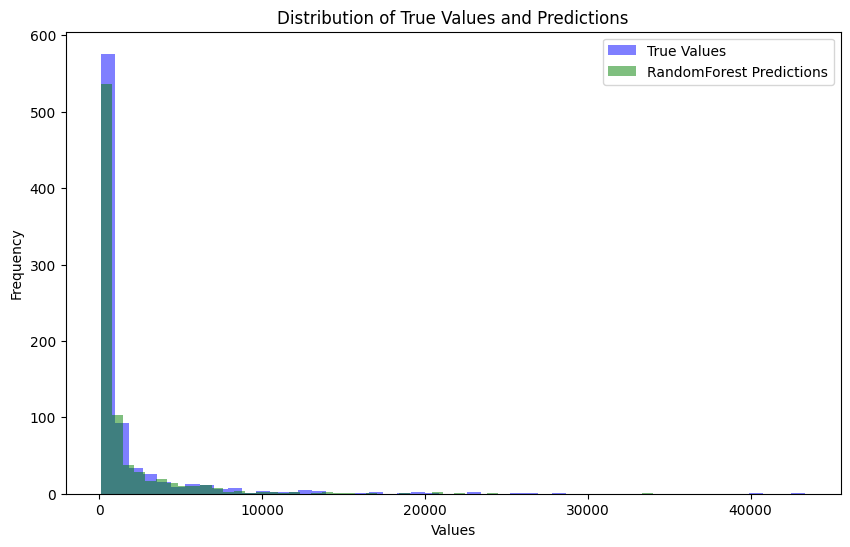

In [48]:
plt.figure(figsize=(10, 6))

# Histogram for True Values
plt.hist(np.exp(y_test), bins=50, alpha=0.5, label='True Values', color='blue')

# Histogram for XGBoost Predictions
#plt.hist(results_comparison['XGBoost_Predictions'], bins=50, alpha=0.5, label='XGBoost Predictions', color='orange')

# Histogram for RandomForest Predictions
plt.hist(results_comparison['RandomForest_Predictions'], bins=50, alpha=0.5, label='RandomForest Predictions', color='green')

# plt.hist(results_comparison['light_Gbm'], bins=50, alpha=0.5, label='Gradient_Boost Predictions', color='green')


plt.title('Distribution of True Values and Predictions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [49]:
y_test

5441    5.741881
4359    5.651085
1084    7.243627
896     5.365415
3964    4.958008
          ...   
654     6.202333
350     4.828634
3728    5.627261
3151    5.409769
1514    9.234478
Name: Cost, Length: 821, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

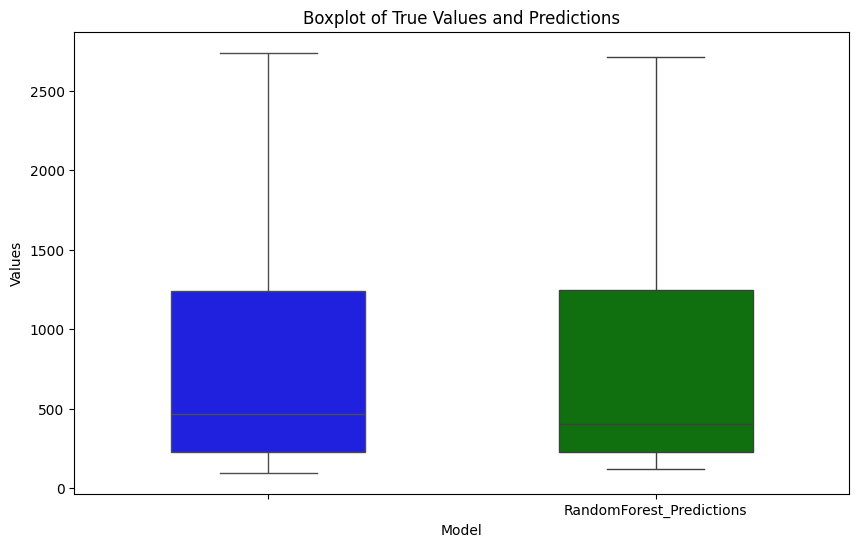

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have results_comparison DataFrame
plt.figure(figsize=(10, 6))

# Boxplot for True Values
sns.boxplot(data=np.exp(y_test), color='blue', width=0.5, showfliers=False)

# Boxplot for XGBoost Predictions
#sns.boxplot(data=results_comparison[['XGBoost_Predictions']], color='orange', width=0.5, showfliers=False)

# Boxplot for RandomForest Predictions
sns.boxplot(data=results_comparison[['RandomForest_Predictions']], color='green', width=0.5, showfliers=False)


#sns.boxplot(data=results_comparison[['light_Gbm']], color='green', width=0.5, showfliers=False)

plt.title('Boxplot of True Values and Predictions')
plt.xlabel('Model')
plt.ylabel('Values')
plt.show


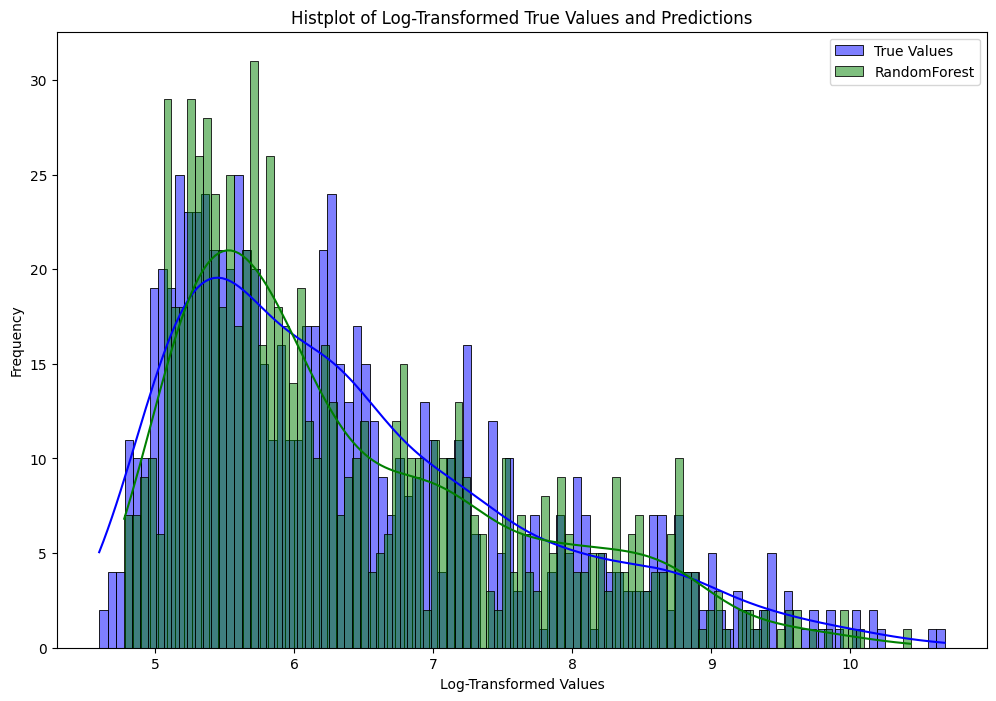

In [53]:
plt.figure(figsize=(12, 8))

# Log-transform and Histplot for True Values
sns.histplot(np.log1p(np.exp(y_test)), color='blue', bins=100, kde=True, label='True Values')

# Log-transform and Histplot for XGBoost Predictions
#sns.histplot(np.log1p(results_comparison['XGBoost_Predictions']), color='orange', bins=100, kde=True, label='XGBoost')

# Log-transform and Histplot for RandomForest Predictions
sns.histplot(np.log1p(results_comparison['RandomForest_Predictions']), color='green', bins=100, kde=True, label='RandomForest')

# Log-transform and Histplot for light_Gbm Predictions
#sns.histplot(np.log1p(results_comparison['light_Gbm']), color='red', bins=100, kde=True, label='light_Gbm')

plt.title('Histplot of Log-Transformed True Values and Predictions')
plt.xlabel('Log-Transformed Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [60]:
def ensemble_regression(models, X_train, y_train, X_test):
    """
    Ensemble three regression models (XGBoost, LightGBM, Random Forest) using averaging.

    Parameters:
    - models: List of regression models (XGBoost, LightGBM, RandomForest)
    - X_train: Training features
    - y_train: Training labels
    - X_test: Testing features

    Returns:
    - final_predictions: Averaged predictions on the test set
    """

    # Split the data for meta-model training
    X_train_base, X_meta, y_train_base, y_meta = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train base regression models
    predictions_base = []
    for model in models:
        model.fit(X_train_base, y_train_base)
        pred_base = model.predict(X_meta)
        predictions_base.append(pred_base)

    # Average predictions from base models
    avg_predictions = np.mean(predictions_base, axis=0)

    # Evaluate the performance on the validation set
    mse = mean_squared_error(y_meta, avg_predictions)
    print(f'Mean Squared Error on Validation Set: {mse}')

    # Make predictions on the test set
    final_predictions = np.mean([model.predict(X_test) for model in models], axis=0)

    return np.exp(final_predictions)

# Example usage:
# Assuming X_train, y_train, X_test are your training features, training labels, and testing features.
#xgb_model = best_xgboost_model
rf_model = best_rf_model

#models = [xgb_model, lgbm_model, rf_model]
models = [ rf_model]
final_predictions = ensemble_regression(models, X_train, y_train, X_test)

prediction_df=pd.DataFrame()
prediction_df["Test_Data"]=np.exp(y_test)
prediction_df["Predictions"]=final_predictions

prediction_df

Mean Squared Error on Validation Set: 0.12050145882759411


,Test_Data,Predictions
5441,311.65,310.168064
4359,284.60,221.125528
1084,1399.16,1694.056606
896,213.88,235.114833
3964,142.31,192.526847
...,...,...
654,493.90,542.033960
350,125.04,158.334907
3728,277.90,267.251290
3151,223.58,200.458287


C:\Users\Hitesh\AppData\Local\Temp\ipykernel_1072\3708177913.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Values', data=melted_df, palette={"True Values": "blue", "Predictions": "green"}, showfliers=False)


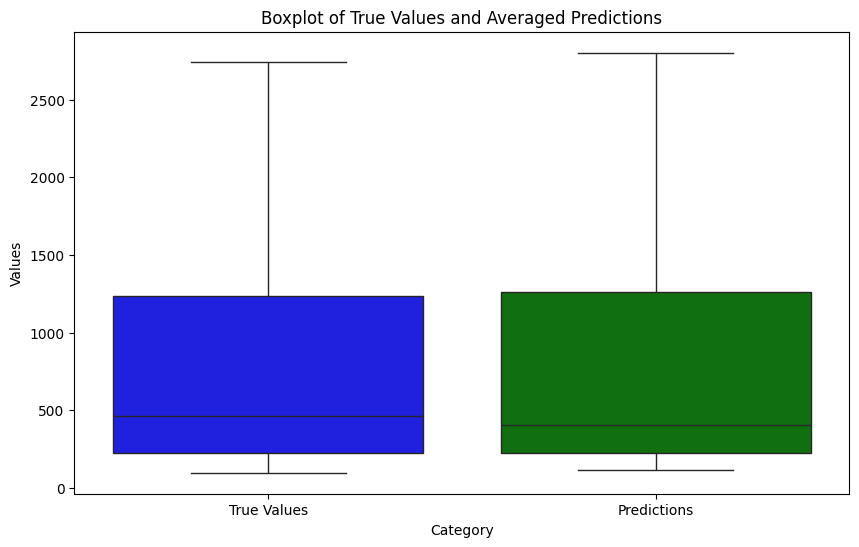

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have results_comparison DataFrame
plt.figure(figsize=(10, 6))

# Combine "Test_Data" and "Averaged_Predictions" into a single DataFrame for plotting
combined_df = pd.concat([prediction_df["Test_Data"].rename("True Values"),
                        prediction_df["Predictions"].rename("Predictions")],
                       axis=1)

# Melt the DataFrame to have a 'variable' column for hue
melted_df = pd.melt(combined_df, var_name='Category', value_name='Values')

# Create a boxplot with hue to distinguish between true values and predictions
sns.boxplot(x='Category', y='Values', data=melted_df, palette={"True Values": "blue", "Predictions": "green"}, showfliers=False)

plt.title('Boxplot of True Values and  Predictions')
plt.ylabel('Values')

# Show the plot
plt.show()


In [52]:
import os
import pickle
import yaml
import joblib  # Use joblib for pickling models

def save_model(model, model_params, r2_score, folder_name, model_name):
    # Create the folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Save the model object using joblib
    model_filename = os.path.join(folder_name, f'{model_name}_model.joblib')
    joblib.dump(model, model_filename)

    # Save the model parameters and R2 score to a YAML file
    yaml_data = {
        'Model': model_name,
        'Model_Parameters': model_params,
        'R2_Score': r2_score
    }

    yaml_filename = os.path.join(folder_name, f'{model_name}_params.yaml')
    with open(yaml_filename, 'w') as yaml_file:
        yaml.dump(yaml_data, yaml_file)

    print(f"Model and parameters saved to {model_filename} and {yaml_filename}")

# Example usage
# Assuming you have a model object named 'your_model', its parameters 'your_model_params',
# R2 score 'your_r2_score', and a folder named 'your_folder_name'
save_model(model=best_xgboost_model, 
           model_params= results_df['Best_Parameters'].iloc[0], 
           r2_score=str(results_df['Final_Optimized_Score'].iloc[0]),
           folder_name=os.path.join("Models",results_df['Model'].iloc[0]),
           model_name=results_df['Model'].iloc[0])


save_model(model=best_rf_model, 
           model_params= results_df['Best_Parameters'].iloc[1], 
           r2_score=str(results_df['Final_Optimized_Score'].iloc[1]),
           folder_name=os.path.join("Models",results_df['Model'].iloc[1]),
           model_name=results_df['Model'].iloc[1])

save_model(model=light_gbm_model, 
           model_params= results_df['Best_Parameters'].iloc[2], 
           r2_score=str(results_df['Final_Optimized_Score'].iloc[2]),
           folder_name=os.path.join("Models",results_df['Model'].iloc[2]),
           model_name=results_df['Model'].iloc[2])

NameError: name 'best_xgboost_model' is not defined

In [55]:
results_df

,Model,Best_Parameters,Final_Optimized_Score
0,Random Forest,"{'n_estimators': 182, 'max_depth': 9, 'min_sam...",0.902658


In [59]:
def ensemble_regression(models, X_train, y_train, X_test):
    """
    Ensemble three regression models (XGBoost, LightGBM, Random Forest) using averaging.

    Parameters:
    - models: List of regression models (XGBoost, LightGBM, RandomForest)
    - X_train: Training features
    - y_train: Training labels
    - X_test: Testing features

    Returns:
    - final_predictions: Averaged predictions on the test set
    """

    # Split the data for meta-model training
    X_train_base, X_meta, y_train_base, y_meta = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train base regression models
    predictions_base = []
    for model in models:
        model.fit(X_train_base, y_train_base)
        pred_base = model.predict(X_meta)
        predictions_base.append(pred_base)

    # Average predictions from base models
    avg_predictions = np.mean(predictions_base, axis=0)

    # Evaluate the performance on the validation set
    mse = mean_squared_error(y_meta, avg_predictions)
    print(f'Mean Squared Error on Validation Set: {mse}')

    # Make predictions on the test set
    final_predictions = np.mean([model.predict(X_test) for model in models], axis=0)

    return np.exp(final_predictions)

# Example usage:
# Assuming X_train, y_train, X_test are your training features, training labels, and testing features.
#xgb_model = best_xgboost_model
rf_model = best_rf_model

#models = [xgb_model, lgbm_model, rf_model]
models = [ rf_model]
final_predictions = ensemble_regression(models, X_train, y_train, X_test)

ensemble_df=pd.DataFrame()
ensemble_df["Test_Data"]=np.exp(y_test)
ensemble_df["Averaged_Predictions"]=final_predictions

ensemble_df

Mean Squared Error on Validation Set: 0.12180258433107459


In [57]:
ensemble_df=pd.DataFrame()
ensemble_df["Test_Data"]=np.exp(y_test)
ensemble_df["Averaged_Predictions"]=final_predictions

ensemble_df

NameError: name 'final_predictions' is not defined

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have results_comparison DataFrame
plt.figure(figsize=(10, 6))

# Combine "Test_Data" and "Averaged_Predictions" into a single DataFrame for plotting
combined_df = pd.concat([ensemble_df["Test_Data"].rename("True Values"),
                        ensemble_df["Averaged_Predictions"].rename("Averaged Predictions")],
                       axis=1)

# Melt the DataFrame to have a 'variable' column for hue
melted_df = pd.melt(combined_df, var_name='Category', value_name='Values')

# Create a boxplot with hue to distinguish between true values and predictions
sns.boxplot(x='Category', y='Values', data=melted_df, palette={"True Values": "blue", "Averaged Predictions": "green"}, showfliers=False)

plt.title('Boxplot of True Values and Averaged Predictions')
plt.ylabel('Values')

# Show the plot
plt.show()


KeyError: 'Averaged_Predictions'

<Figure size 1000x600 with 0 Axes>